In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
list(enumerate(train.columns))

[(0, 'id'),
 (1, 'vendor_id'),
 (2, 'pickup_datetime'),
 (3, 'dropoff_datetime'),
 (4, 'passenger_count'),
 (5, 'pickup_longitude'),
 (6, 'pickup_latitude'),
 (7, 'dropoff_longitude'),
 (8, 'dropoff_latitude'),
 (9, 'store_and_fwd_flag'),
 (10, 'trip_duration')]

In [4]:
list(enumerate(test.columns))

[(0, 'id'),
 (1, 'vendor_id'),
 (2, 'pickup_datetime'),
 (3, 'passenger_count'),
 (4, 'pickup_longitude'),
 (5, 'pickup_latitude'),
 (6, 'dropoff_longitude'),
 (7, 'dropoff_latitude'),
 (8, 'store_and_fwd_flag')]

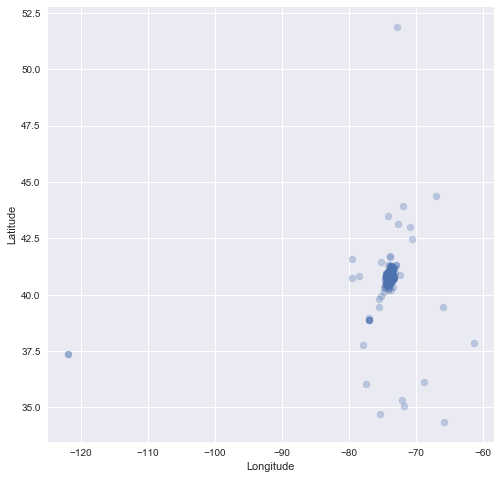

In [5]:
fig1 = plt.figure(figsize=(8, 8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(x=train.pickup_longitude.values, y=train.pickup_latitude.values, alpha=.3)

In [6]:
fig1.savefig('./img/pickups_all.png')

In [7]:
type(train.pickup_latitude[0])

numpy.float64

(-74.099999999999994,
 -73.700000000000003,
 40.600000000000001,
 40.899999999999999)

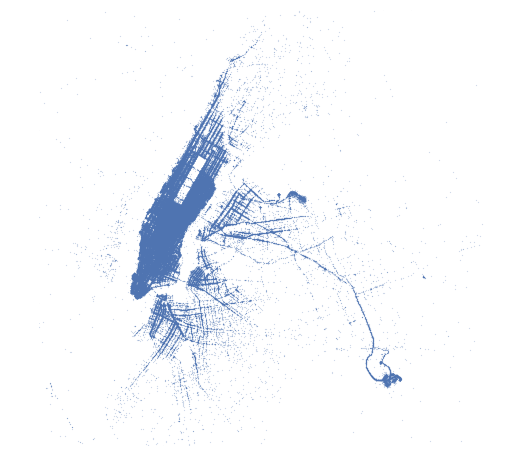

In [8]:
fig2 = plt.figure(figsize=(8, 8))
plt.scatter(x=train.pickup_longitude.values, y=train.pickup_latitude.values, s=1, alpha=.2)
plt.xlim([-74.1,-73.7])
plt.ylim([40.6, 40.9])
plt.axis('off')

In [9]:
fig2.savefig('./img/pickups_nyarea.png')

In [10]:
# Compute the correlation matrix
corr = train.corr()
print corr[~(corr == 1)].max(), corr.min()

vendor_id            0.287415
passenger_count      0.287415
pickup_longitude     0.783582
pickup_latitude      0.494038
dropoff_longitude    0.783582
dropoff_latitude     0.494038
trip_duration        0.026542
dtype: float64 vendor_id            0.001528
passenger_count     -0.005125
pickup_longitude     0.002169
pickup_latitude     -0.029204
dropoff_longitude   -0.000343
dropoff_latitude    -0.020677
trip_duration       -0.029204
dtype: float64


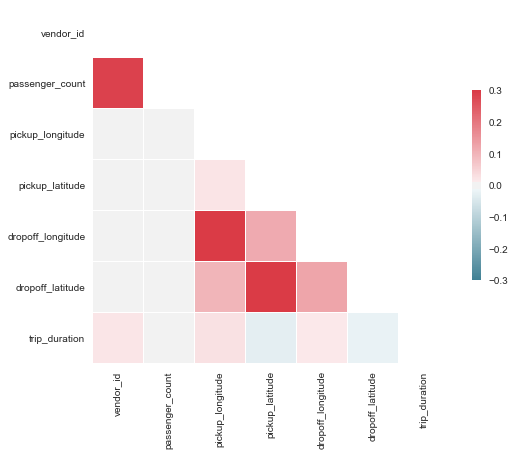

In [11]:
sns.set_style("whitegrid")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})